In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.figure_factory as ff 

In [6]:
#reading the csv dataset.
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [7]:
data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [50]:
# reseting the column and index
data = data.reset_index()

In [51]:
#checking the data types
data.dtypes

index                         int64
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [52]:
#checking for the number of columns and rows
data.shape

(299, 14)

In [53]:
data.columns

Index(['index', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [55]:
#summary statistics
data.describe()

index         age     anaemia  creatinine_phosphokinase  \
count  299.000000  299.000000  299.000000                299.000000   
mean   149.000000   60.833893    0.431438                581.839465   
std     86.458082   11.894809    0.496107                970.287881   
min      0.000000   40.000000    0.000000                 23.000000   
25%     74.500000   51.000000    0.000000                116.500000   
50%    149.000000   60.000000    0.000000                250.000000   
75%    223.500000   70.000000    1.000000                582.000000   
max    298.000000   95.000000    1.000000               7861.000000   

         diabetes  ejection_fraction  high_blood_pressure      platelets  \
count  299.000000         299.000000           299.000000     299.000000   
mean     0.418060          38.083612             0.351171  263358.029264   
std      0.494067          11.834841             0.478136   97804.236869   
min      0.000000          14.000000             0.000000   25100.000000   
25%      0.000000          30.000000             0.000000  212500.000000   
50%      0.000000          38.000000             0.000000  262000.000000   
75%      1.000000          45.000000             1.000000  303500.000000   
max      1.000000          80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              299 non-null    int64  
 10  sex                       299 non-null    int64  
 11  smoking                   299 non-null    int64  
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

### DATA VISUALIZATION

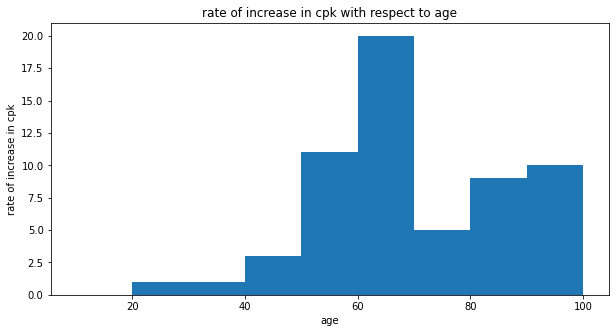

In [100]:
#plot, showing the the age range that has the highest amount of creatinine phoshokinase
plt.figure(figsize=(10,5))
bins=[10,20,30,40,50,60,70,80,90,100]
plt.hist(data.creatinine_phosphokinase,bins=bins)
plt.title('rate of increase in cpk with respect to age')
plt.ylabel('rate of increase in cpk')
plt.xlabel('age')
plt.show()

#### A correlation map that shows the relationship between the death rate and other leading factors that contribute to the death of these patients

In [147]:
# visualization to the show the relationship between these death causing events and how they contribute to death event
# using a correlation plot
data=data[['DEATH_EVENT','age','creatinine_phosphokinase','serum_creatinine','diabetes','high_blood_pressure','platelets','serum_sodium','anaemia']]
data.head()

DEATH_EVENT   age  creatinine_phosphokinase  serum_creatinine  diabetes  \
0            1  75.0                       582               1.9         0   
1            1  55.0                      7861               1.1         0   
2            1  65.0                       146               1.3         0   
3            1  50.0                       111               1.9         0   
4            1  65.0                       160               2.7         1   

   high_blood_pressure  platelets  serum_sodium  anaemia  
0                    1  265000.00           130        0  
1                    0  263358.03           136        0  
2                    0  162000.00           129        0  
3                    0  210000.00           137        1  
4                    0  327000.00           116        1

In [59]:
# plt.figure(figsize=(10,5))
data.corr().style.background_gradient(cmap='coolwarm')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

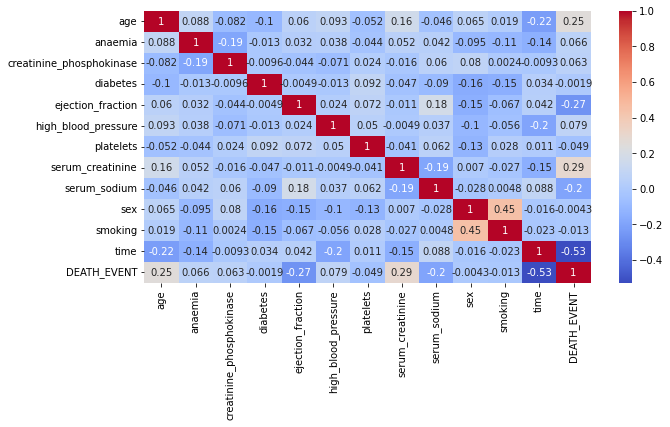

In [146]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True, cmap ='coolwarm')

## Inference:
* From the plot above, only the variable age, serum creatinine and smoking show a correlation with the death event

<Figure size 1440x576 with 0 Axes>

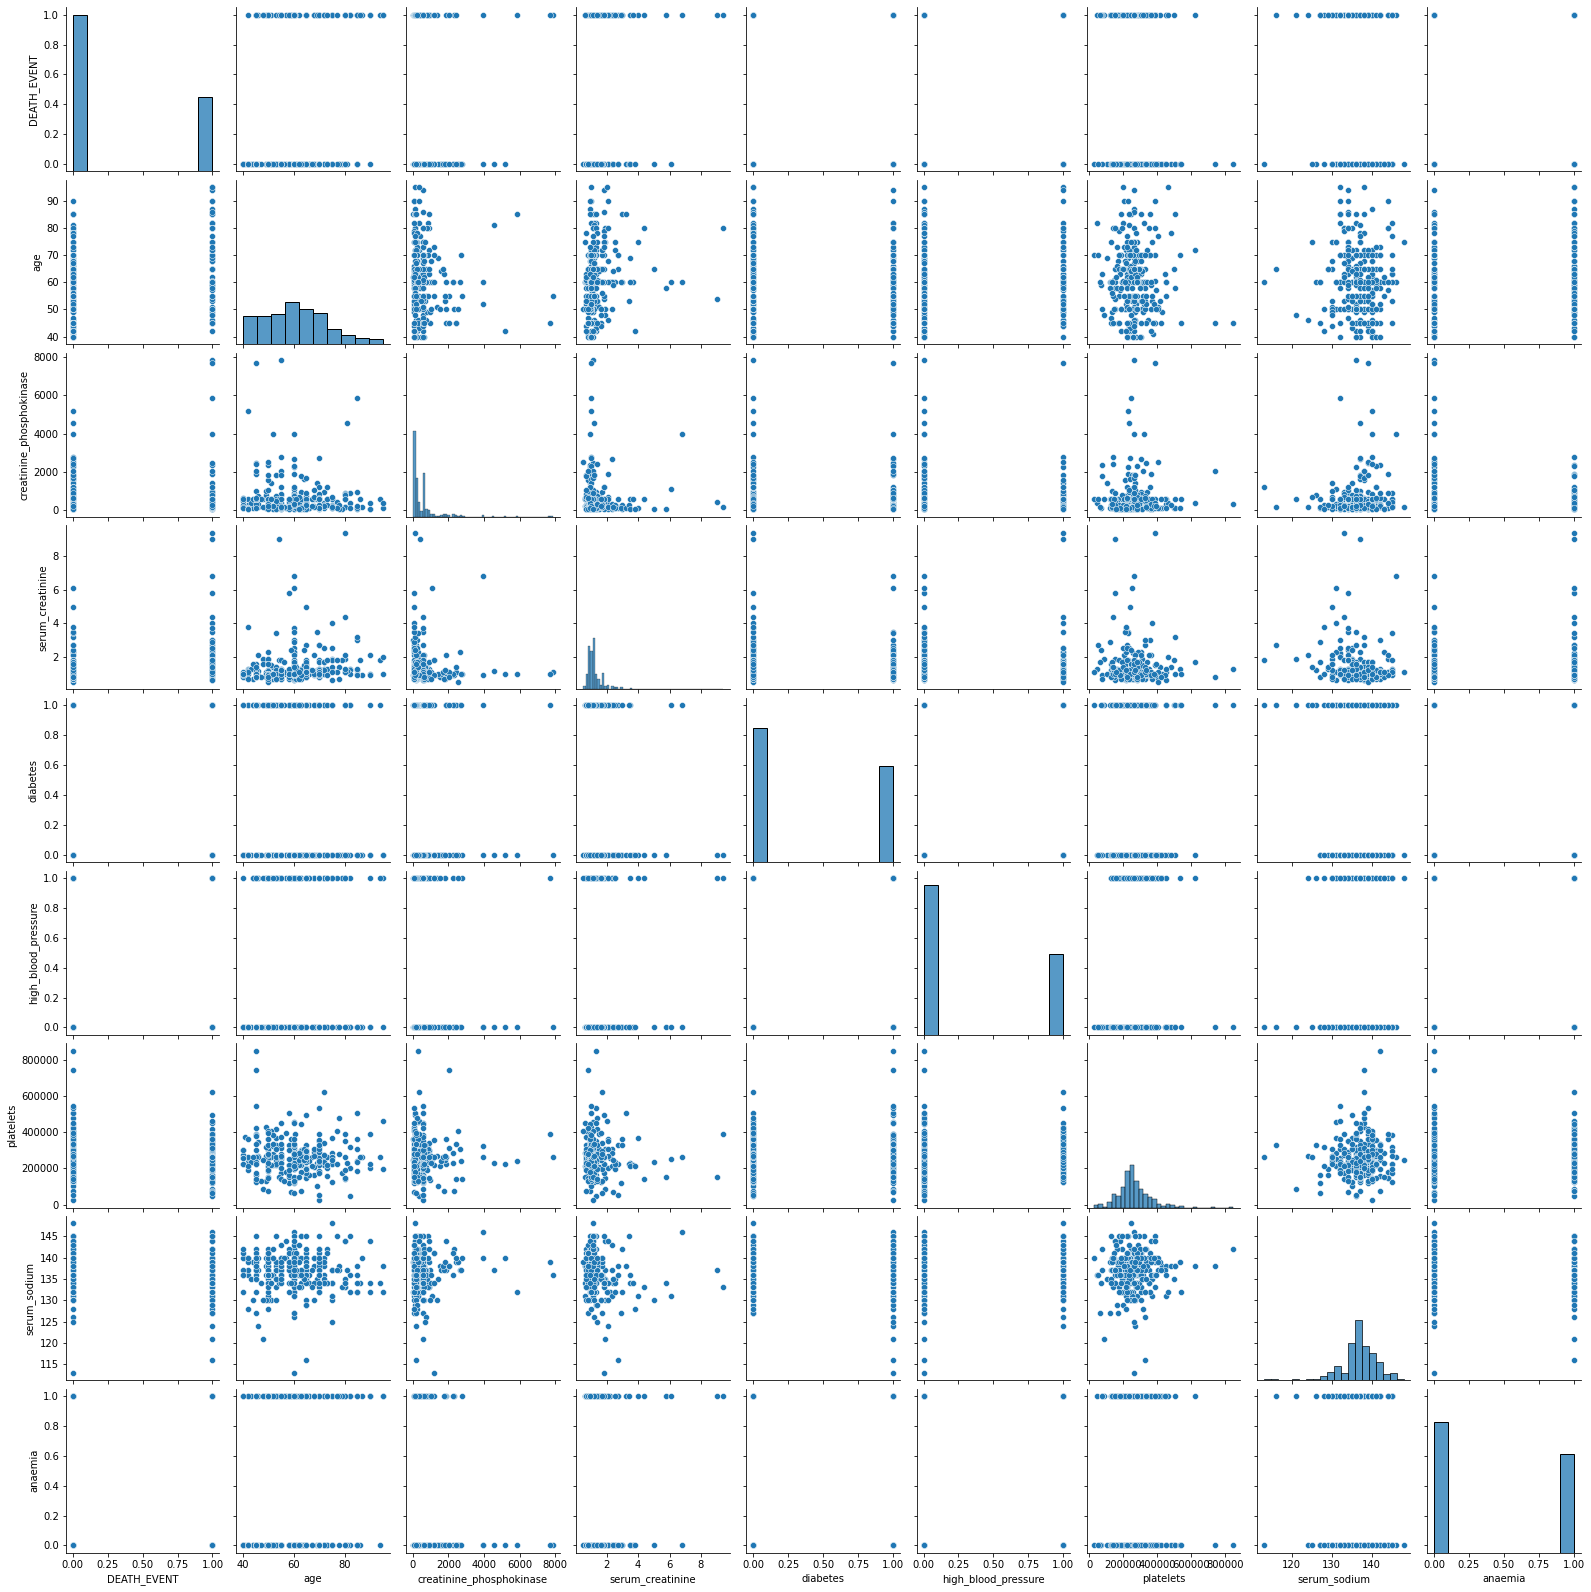

In [149]:
#pairing every death causing factors with age and the death event, to check which factors cause death more
plt.figure(figsize=(20,8))
size=1,2,1
sns.pairplot(data=data)

### INFERENCE:
#### from the pair plot above, shows the relationship between each one of the variables and how they contribute to the heart failure and eventual death in patients
* looking at the relationship between creatine phosphokinase and the death event, it shows that the death rate is higher as it increases.
* death rate also increased with an increase in serum creatinine. 

### To further check for how these factors that caused death affected both genders, and which gender suffered the most from what factor

In [68]:

#number of male and female
# 0=female, 1=male
data['sex'].value_counts()
print('total number of male is 195\n','total number of females is 105')

total number of male is 195
 total number of females is 105


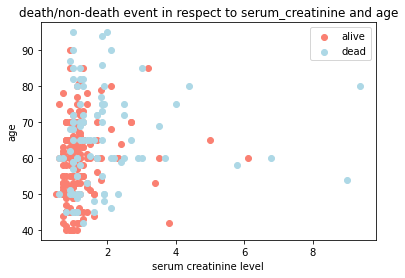

<Figure size 1440x576 with 0 Axes>

In [10]:
# scatter plot to show death even a s a result of increased amount of serum creatinine
# def scatter(x,fig):
#     plt.scatter(5,2,fig)
plt.scatter(data.serum_creatinine[data.DEATH_EVENT==0],data.age[data.DEATH_EVENT==0], c='salmon') #patients that did not die
plt.scatter(data.serum_creatinine[data.DEATH_EVENT==1],data.age[data.DEATH_EVENT==1], c='lightblue') #patients that died
plt.title('death/non-death event in respect to serum_creatinine and age')
plt.ylabel('age')
plt.xlabel('serum creatinine level')
plt.legend(['alive','dead'])
plt.figure(figsize=(20,8))

# scatter('serum_creatinine',1)
# scatter('serum_sodium',2)
# scatter('creatinine_phosphokinase',3)
# scatter('platelets',4)

plt.show()


### Inference: 
#### This plot shows the number of patients that had died as result of increase creatinine in the serum, and those that had did not die.

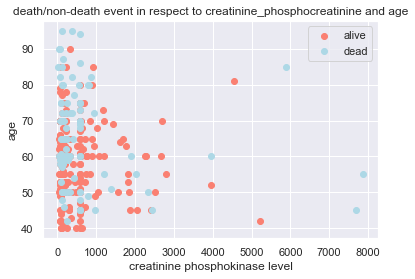

<Figure size 1440x576 with 0 Axes>

In [69]:
plt.scatter(data.creatinine_phosphokinase[data.DEATH_EVENT==0],data.age[data.DEATH_EVENT==0], c='salmon') #patients that did not die
plt.scatter(data.creatinine_phosphokinase[data.DEATH_EVENT==1],data.age[data.DEATH_EVENT==1], c='lightblue') #patients that died
plt.title('death/non-death event in respect to creatinine_phosphocreatinine and age')
plt.ylabel('age')
plt.xlabel('creatinine phosphokinase level')
plt.legend(['alive','dead'])
plt.figure(figsize=(20,8))


# plt.scatter(data['creatinine_phosphokinase'],data['age'])
# plt.title('creatinine_phosphokinase vs age')
# plt.ylabel('age')
# plt.xlabel('creatinine phosphokinase level')
# plt.figure(figsize=(20,8))

plt.show()

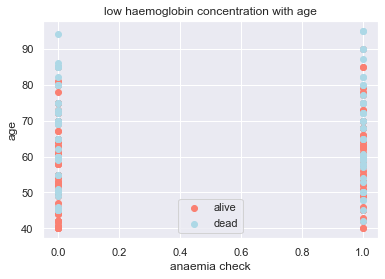

<Figure size 1440x576 with 0 Axes>

In [72]:

plt.scatter(data.anaemia[data.DEATH_EVENT==0],data.age[data.DEATH_EVENT==0], c='salmon') #patients that did not die
plt.scatter(data.anaemia[data.DEATH_EVENT==1],data.age[data.DEATH_EVENT==1], c='lightblue') #patients that died
plt.title('low haemoglobin concentration with age')
plt.ylabel('age')
plt.xlabel('anaemia check')
plt.legend(['alive','dead'])
plt.figure(figsize=(20,8))

plt.show()
# plt.scatter(data['anaemia'],data['age'])
# plt.title('anaemia vs age')
# plt.ylabel('age')
# plt.xlabel('anaemia level')
# plt.figure(figsize=(20,8))

### Inference:
* The plot above shows those that had anaemia( a low heamoglobin concentration) and that had died as a result
* Although anaemia is a death cause, but the ratio of the those that had died to those that had survived seems equal.

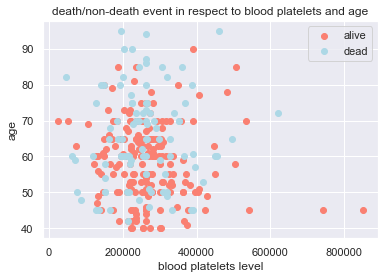

<Figure size 1440x576 with 0 Axes>

In [73]:
plt.scatter(data.platelets[data.DEATH_EVENT==0],data.age[data.DEATH_EVENT==0], c='salmon') #patients that did not die
plt.scatter(data.platelets[data.DEATH_EVENT==1],data.age[data.DEATH_EVENT==1], c='lightblue') #patients that died
plt.title('death/non-death event in respect to blood platelets and age')
plt.ylabel('age')
plt.xlabel('blood platelets level')
plt.legend(['alive','dead'])
plt.figure(figsize=(20,8))
plt.show()
# plt.scatter(data['platelets'],data['age'])
# plt.title('platelets vs age')
# plt.ylabel('age')
# plt.xlabel('blood platelets level')
# plt.figure(figsize=(20,8))

### Inference:
* A low blood platelets concentration also caused.
* those that are diabetic tend to have low concentration of blood platelets(which will cause low rate of wounds healing that could cause worse effects and even death) which can in turn cause heart failure

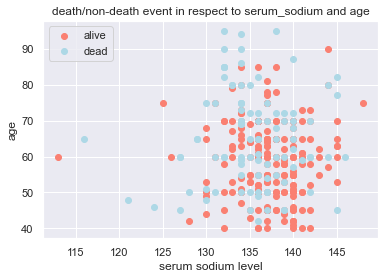

<Figure size 1440x576 with 0 Axes>

In [75]:
plt.scatter(data.serum_sodium[data.DEATH_EVENT==0],data.age[data.DEATH_EVENT==0], c='salmon') #patients that did not die
plt.scatter(data.serum_sodium[data.DEATH_EVENT==1],data.age[data.DEATH_EVENT==1], c='lightblue') #patients that died
plt.title('death/non-death event in respect to serum_sodium and age')
plt.ylabel('age')
plt.xlabel('serum sodium level')
plt.legend(['alive','dead'])
plt.figure(figsize=(20,8))
plt.show()

# plt.scatter(data['serum_sodium'],data['age'])
# plt.title('serum sodium vs age')

# plt.ylabel('age')
# plt.xlabel('serum sodium level')
# plt.figure(figsize=(20,8))

### Inference:
* the normal range of serum sodium in the blood is 135-145mEq/L anything below this range leads to condition(hyponetrema) which can lead to heart attack and can lead to death.
* from the plot a few number of people had serum sodium which is below the normal range
* There is a possibility that those had a low amount of serum sodium could have possibly had this condition that would have led to their death.

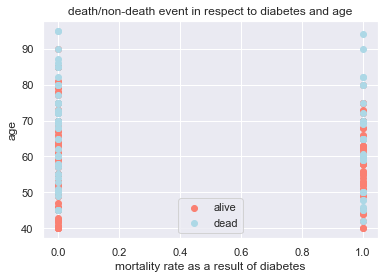

<Figure size 1440x576 with 0 Axes>

In [76]:
plt.scatter(data.diabetes[data.DEATH_EVENT==0],data.age[data.DEATH_EVENT==0], c='salmon') #patients that did not die
plt.scatter(data.diabetes[data.DEATH_EVENT==1],data.age[data.DEATH_EVENT==1], c='lightblue') #patients that died
plt.title('death/non-death event in respect to diabetes and age')
plt.ylabel('age')
plt.xlabel('mortality rate as a result of diabetes')
plt.legend(['alive','dead'])
plt.figure(figsize=(20,8))

plt.show()
# plt.scatter(data['diabetes'],data['age'])
# plt.title('diabetes vs age')
# plt.ylabel('age')
# plt.xlabel('diabetes')
# plt.figure(figsize=(20,8))

### Inference:
* From the plot above, Those that were non diabetic and died eventually were more than those that were diabetic and died eventually
* Those that are non diabetic and did not die, lived up to 80years and more, while those that were diabetic and did not die had not lived up to 80 years of age. 
* This could also infer that the diabetic condition, also caused a shortened life span

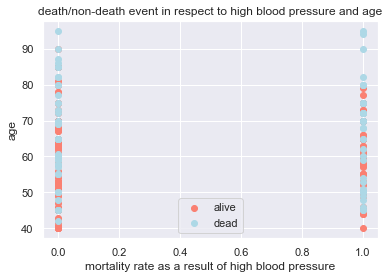

<Figure size 1440x576 with 0 Axes>

In [78]:
plt.scatter(data.high_blood_pressure[data.DEATH_EVENT==0],data.age[data.DEATH_EVENT==0], c='salmon') #patients that did not die
plt.scatter(data.high_blood_pressure[data.DEATH_EVENT==1],data.age[data.DEATH_EVENT==1], c='lightblue') #patients that died
plt.title('death/non-death event in respect to high blood pressure and age')
plt.ylabel('age')
plt.xlabel('mortality rate as a result of high blood pressure')
plt.legend(['alive','dead'])
plt.figure(figsize=(20,8))

plt.show()

# plt.scatter(data['high_blood_pressure'],data['age'])
# plt.title('blood pressure vs age')
# plt.ylabel('age')
# plt.xlabel('blood pressure increase')
# plt.figure(figsize=(20,8))

### Inference:
* From the plot, the ratio of those that had died as result of high blood pressure seems to be less than the ratio of those that had died with having the blood pressure condition
* There are more people above the age of 90 that had died as a result of the high blood pressure condition


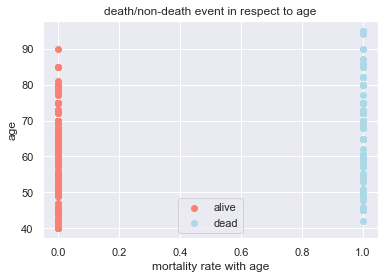

<Figure size 1440x576 with 0 Axes>

In [8]:
plt.scatter(data.DEATH_EVENT[data.DEATH_EVENT==0],data.age[data.DEATH_EVENT==0], c='salmon') #patients that did not die
plt.scatter(data.DEATH_EVENT[data.DEATH_EVENT==1],data.age[data.DEATH_EVENT==1], c='lightblue') #patients that died
plt.title('death/non-death event in respect to age')
plt.ylabel('age')
plt.xlabel('mortality rate with age')
plt.legend(['alive','dead'])
plt.figure(figsize=(20,8))

plt.show()

# plt.scatter(data['DEATH_EVENT'],data['age'])
# plt.title('death event vs age')
# plt.ylabel('age')
# plt.xlabel('death event')
# plt.figure(figsize=(20,8))

#### This simply implies that mortality rate increased with an increase in age.

In [8]:
# plt.scatter(data['smoking'],data['DEATH_EVENT'])
# plt.title('smoking vs death event')
# plt.ylabel('Death Event')
# plt.xlabel('death event based on smoking habit')
# plt.figure(figsize=(20,8))

gender_smoking= data.groupby('sex')['smoking'].sum().sort_values(ascending=False)
fig = px.bar(data,gender_smoking.index, gender_smoking)
fig.update_layout(title='Relationship between gender and smoking - Male = 1 Female =0')
fig.show() 

#### From the plot above, the effect of smoking contributed to the death event of patient,but was not a major factor. This simply implies that there were other underlying factors that contributed to the mortality rate 

<Figure size 1440x576 with 0 Axes>

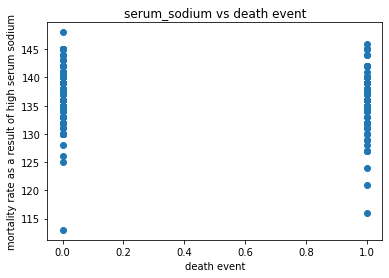

<Figure size 1440x576 with 0 Axes>

In [182]:
plt.scatter(data['DEATH_EVENT'],data['serum_sodium'])
plt.title('serum_sodium vs death event')
plt.ylabel('mortality rate as a result of high serum sodium')
plt.xlabel('death event')
plt.figure(figsize=(20,8))


## serum sodium versus death event
* The normal level of serum sodium is between 135-145mEq/L, any more or less than this range could lead to death, from the plot above, there are few death rate in the those that had more than 145mEq/L of serum sodium.
* There were more death rate in those that had serum sodium of less than 135mEq/L. which is a condition known as hyponetremia (acute hyponetremia could lead to death)


<Figure size 720x576 with 0 Axes>

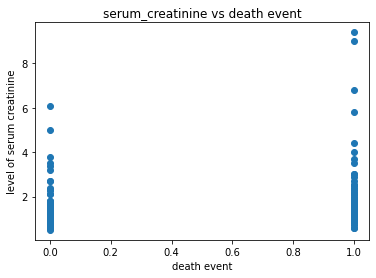

<Figure size 720x576 with 0 Axes>

In [184]:
plt.scatter(data['DEATH_EVENT'],data['serum_creatinine'])
plt.title('serum_creatinine vs death event')
plt.ylabel('level of serum creatinine')
plt.xlabel('death event')
plt.figure(figsize=(10,8))

## serum creatinine versus death event
* The normal range of creatinine that should be in blood of women(adult): 0.59-1.04mg/dL and in men(adult): 0.74-1.35mg/dL 
* From the plot above, it shows that those that had a high amount of serum creatinine died eventually
* Those that did not die, had a lower amount of serum creatinine.

<Figure size 720x576 with 0 Axes>

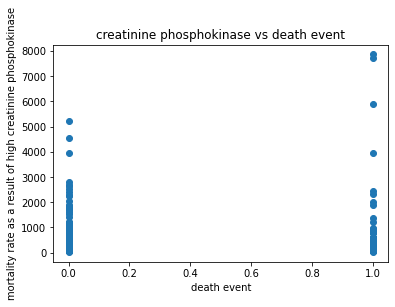

<Figure size 720x576 with 0 Axes>

In [183]:
plt.scatter(data['DEATH_EVENT'],data['creatinine_phosphokinase'])
plt.title('creatinine phosphokinase vs death event')
plt.ylabel('mortality rate as a result of high creatinine phosphokinase')
plt.xlabel('death event')
plt.figure(figsize=(10,8))

## creatinine phosphokinase versus death event
* This plot gives a clear picture of how creatinine phosphokinase level is major factor that contributes to mortality rate.
* A high level of creatinine phosphokinase casues inflammation and injury in the heart and heart attack, which could inturn cause death
* normal CPK level in male(adult):39-308U/L, while in Female(adult):26-192U/L

<Figure size 720x576 with 0 Axes>

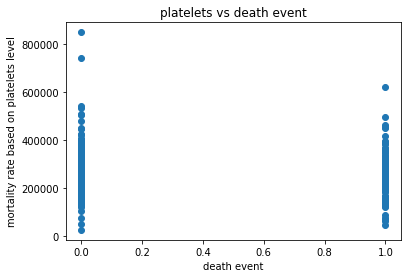

<Figure size 720x576 with 0 Axes>

In [185]:
plt.scatter(data['DEATH_EVENT'],data['platelets'])
plt.title('platelets vs death event')
plt.ylabel('mortality rate based on platelets level')
plt.xlabel('death event')
plt.figure(figsize=(10,8))

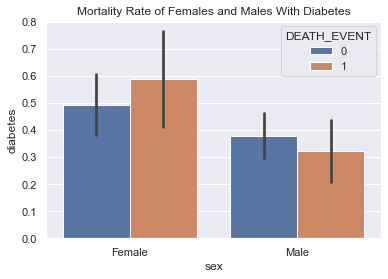

In [86]:
# mortality rate on both gender with diabetes
ax = sns.barplot(x=data.sex, y= data.diabetes,hue=data.DEATH_EVENT, data=data)
ax.set_title("Mortality Rate of Females and Males With Diabetes")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

# plt.scatter(data['DEATH_EVENT'],data['diabetes'])
# plt.title('diabetes vs death event')
# plt.ylabel('mortality rate as a result of diabetes')
# plt.xlabel('death event')
# plt.figure(figsize=(10,8))

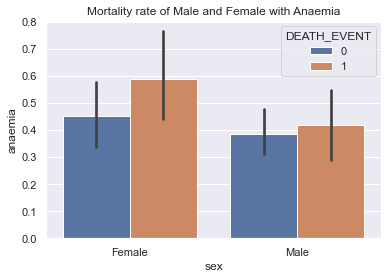

In [12]:
ax = sns.barplot(x=data.sex, y= data.anaemia,hue=data.DEATH_EVENT, data=data)
ax.set_title("Mortality rate of Male and Female with Anaemia")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()


# plt.scatter(data['DEATH_EVENT'],data['anaemia'])
# plt.title('anaemia vs death event')
# plt.ylabel('mortality rate as a result of anaemia')
# plt.xlabel('death event')
# plt.figure(figsize=(10,8))

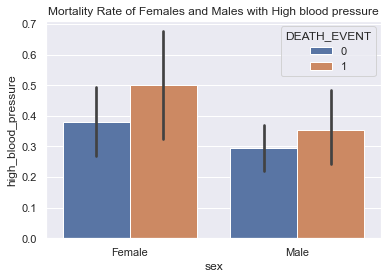

In [18]:
ax = sns.barplot(x=data.sex, y= data.high_blood_pressure,hue=data.DEATH_EVENT, data=data)
ax.set_title("Mortality Rate of Females and Males with High blood pressure")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

# plt.scatter(data['DEATH_EVENT'],data['high_blood_pressure'])
# plt.title('high blood pressure vs death event')
# plt.ylabel('mortality rate as a result of high blood pressure')
# plt.xlabel('death event')
# plt.figure(figsize=(10,8))

### Inference:
* There were more men that died as a result of high blodd pressure

## DATA VISUALIZATION ON EACH SEX BASED ON DEATH FACTORS

In [16]:
# visualization of each sex; male or female, based on the various death factors
# sns.boxplot(data,x='DEATH_EVENT',y='age',color='sex')

# fig.update_layout(title_text="Age Spread and Death Event Based on Sex - Male = 1 Female =0")
# fig.show() 
# plt.figure(figsize=(10,8))
# plt.title('age spread and death event based on sex')
# sns.boxplot(x=data.DEATH_EVENT, y=data.age, palette='Blues_d')
# plt.legend(['female','male'])

fig = px.box(data, x='DEATH_EVENT', y='age',color='sex')
fig.update_layout(title_text="Gender wise Age Spread and Death - Male = 1 Female =0")
fig.show() 

### Inference:
* The mortality rate of both male and female, is equal

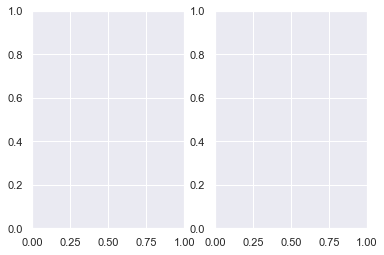

In [19]:
# To what sex had a higher mortality rate based on serum creatinine and creatinine phosphokinase 
plt.subplot(1,2,1)
fig = px.box(data, x='DEATH_EVENT', y='serum_creatinine',color='sex')
fig.update_layout(title_text="Gender serum creatinine Spread and mortality - Male = 1 Female =0")
fig.show()

plt.subplot(1,2,2)
fig = px.box(data, x='DEATH_EVENT', y='creatinine_phosphokinase',color='sex')
fig.update_layout(title_text="Gender creatinine phosphoskinase Spread and mortality - Male = 1 Female =0")
fig.show()

### Inference:
* From the plot above, the men had a higer mortality rate with a high amount of serum creatinine and creatinine phosphokinase 

In [20]:
# what gender smokes more and how smoking led to mortality
fig = px.box(data, x='DEATH_EVENT', y='smoking',color='sex')
fig.update_layout(title_text="Gender smoking Spread and mortality - Male = 1 Female =0")
fig.show()

### Inference:
* The men that smoked the most and had the highest mortality rate
* In women, there was only one death event as result of smoking

In [3]:
fig = px.box(data, x='DEATH_EVENT', y='high_blood_pressure',color='sex')
fig.update_layout(title_text="Gender high blood pressur Spread and mortality - Male = 1 Female =0")
fig.show()

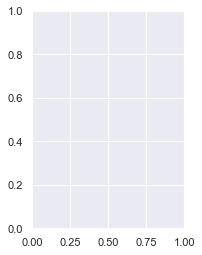

In [4]:
plt.subplot(1,2,1)
fig = px.box(data, x='DEATH_EVENT', y='serum_sodium',color='sex')
fig.update_layout(title_text="Gender serum sodium Spread and mortality - Male = 1 Female =0")
fig.show()


### Inference:
* The mortality rate of women that had high serum sodium is slightly higher than that of men

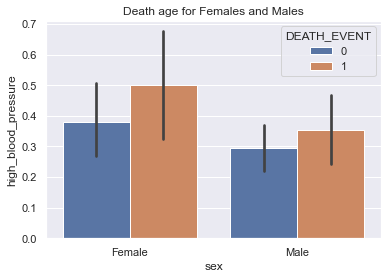

In [82]:
ax = sns.barplot(x=data.sex, y= data.high_blood_pressure,hue=data.DEATH_EVENT, data=data)
ax.set_title("Death age for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [21]:
#to find out which gender had the highest mortality rate
gender_smoking= data.groupby('sex')['DEATH_EVENT'].sum().sort_values(ascending=False)
fig = px.bar(data,gender_smoking.index, gender_smoking)
fig.update_layout(title='Gender with the Highest Mortality Rate - Male = 1 Female =0')
fig.show() 

## Inference:
* From the plot above is to show what gender had the highest mortality rate, and it shows that the male gender had the highest mortality rate

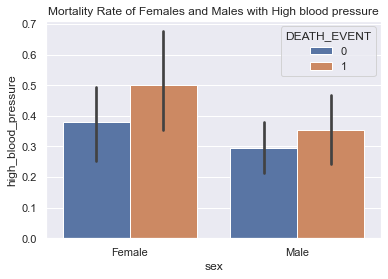

In [35]:
ax = sns.barplot(x=data.sex, y= data.high_blood_pressure,hue=data.DEATH_EVENT, data=data)
ax.set_title("Mortality Rate of Females and Males with High blood pressure")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [18]:
gender_hbp= data.groupby('sex')['high_blood_pressure'].sum().sort_values(ascending=False)
fig = px.bar(data,gender_hbp.index, gender_hbp)
fig.update_layout(title='Relationship between gender and hbp - Male = 1 Female =0')
fig = px.box(data, x='DEATH_EVENT', y='high_blood_pressure')
fig.show() 


## Inference:
* Fromthe plot above, it shows that men had the number of mortality rate as result of high blood pressure

In [15]:
gender_hbp= data.groupby('sex')['anaemia'].sum().sort_values(ascending=False)
# fig = px.bar(data,gender_anaemia.index, gender_anaemia)
fig.update_layout(title='Relationship between gender and anaemia - Male = 1 Female =0')
fig = px.box(data, x='DEATH_EVENT', y='high_blood_pressure')
fig.show() 

In [10]:
fig = px.box(data, x='DEATH_EVENT', y='anaemia',color='sex')
fig.update_layout(title_text="Gender anaemia Spread and mortality - Male = 1 Female =0")
fig.show()

In [14]:
fig = px.box(data, x='DEATH_EVENT', y='diabetes',color='sex')
fig.update_layout(title_text="Gender diabetes Spread and mortality - Male = 1 Female =0")
fig.show()

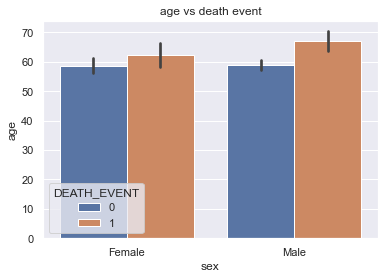

In [22]:
ax = sns.barplot(x=data.sex, y= data.age,hue=data.DEATH_EVENT, data=data)
ax.set_title("age vs death event")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

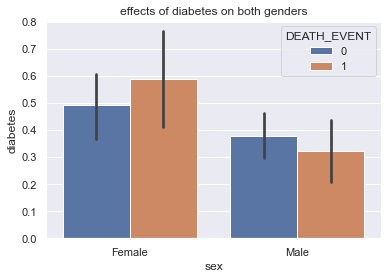

In [31]:
ax = sns.barplot(x=data.sex, y= data.diabetes,hue=data.DEATH_EVENT, data=data)
ax.set_title("effects of diabetes on both genders")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

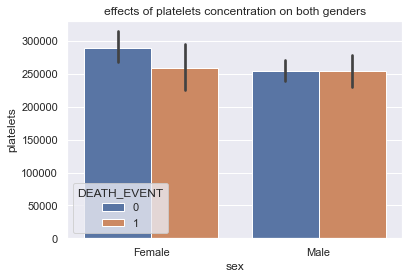

In [32]:
ax = sns.barplot(x=data.sex, y= data.platelets,hue=data.DEATH_EVENT, data=data)
ax.set_title("effects of platelets concentration on both genders")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [5]:
fig = px.box(data, x='DEATH_EVENT', y='platelets',color='sex')
fig.update_layout(title_text="Gender platelets Spread and mortality - Male = 1 Female =0")
fig.show()

## Inference:
* From previous plots in the mortality rate based on diabetes, women had the highest mortality rate.
* From this plot, which is an increase mortality rate based on platelets, women have the highest mortality rate 
* The normal range for blood platelets is 150,000-450,000/microlitre, and a primary or secondary increase with symptoms can lead to heart attack and stroke.
* In this plot, women clearly show an increase in the blood platelets level.

# GENERAL INFERENCE
## The mortality rate among both genders were spread and based on different factors
### For the male gender, they had a high mortality rate based on the following:
* Smoking
* High Blood Pressure
* Creatinine Phosphokinase: a very high increase in cpk
* Serum Creatinine: with a very high increase in S.C

### For the female gender, they had a high mortality rate based on the following:
* Age
* Serum Sodium
* Diabetes
* Platelets

## The male had the highest mortality rate overall.